# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


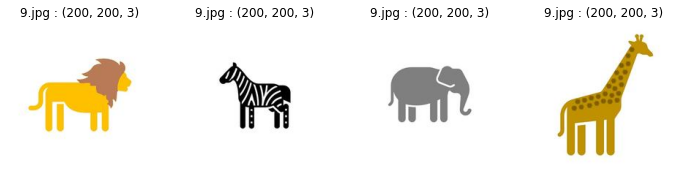

In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = 'data/safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

> **Note**: There is no single "correct" solution. Sample solutions are provided in [05 - Safari CNN Solution (PyTorch).ipynb](05%20-%20Safari%20CNN%20Solution%20(PyTorch).ipynb) and [05 - Safari CNN Solution (TensorFlow).ipynb](05%20-%20Safari%20CNN%20Solution%20(TensorFlow).ipynb).

In [20]:
import tensorflow
from  tensorflow import keras
print('TensorFlow version:',tensorflow.__version__)
print('Keras version:',keras.__version__)

TensorFlow version: 2.10.0
Keras version: 2.10.0


## Data Preparation
Before train the model we need to prepare the data.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (200, 200)
batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 280 images belonging to 4 classes.
Preparing validation dataset...
Found 116 images belonging to 4 classes.
Data generators ready


## Defining the CNN
Call the model for multi-class classification.

In [22]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Flatten the feature maps 
model.add(Flatten())

# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(train_generator.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 92, 92, 32)        36896     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 41, 32)        36896     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 32)      

## Train the model
Using the CNN that we defined.

In [23]:
# Train the model over 5 epochs using 30-image batches and using the validation holdout dataset for validation
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/5
9/9 [==============================] - 6s 674ms/step - loss: 1.0958 - accuracy: 0.5160 - val_loss: 0.4318 - val_accuracy: 1.0000
Epoch 2/5
9/9 [==============================] - 6s 660ms/step - loss: 0.1767 - accuracy: 0.9560 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 3/5
9/9 [==============================] - 6s 652ms/step - loss: 0.0183 - accuracy: 0.9920 - val_loss: 1.9228e-04 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 6s 646ms/step - loss: 1.9643e-04 - accuracy: 1.0000 - val_loss: 2.9866e-06 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 6s 652ms/step - loss: 1.8322e-04 - accuracy: 1.0000 - val_loss: 3.2092e-06 - val_accuracy: 1.0000


## View the lost history

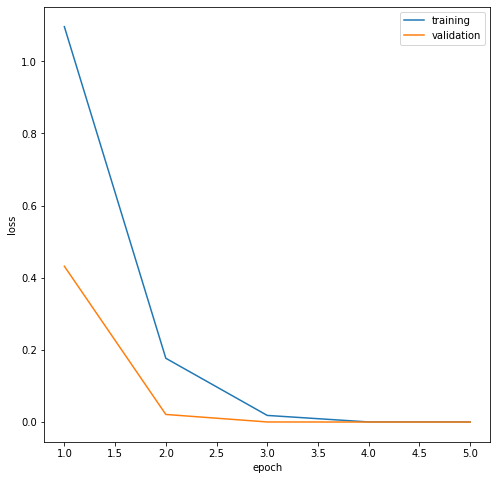

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
fig = plt.figure(figsize=(8,8))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Evaluating the model
For seeing the final accuracy using a confussion matrix.

In [25]:
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]
model.predict(x_test)

1/1 [==============================] - 0s 136ms/step


array([[9.9999994e-01, 7.5480191e-09, 9.0376568e-09, 2.2736857e-10],
       [1.7330462e-23, 5.9966268e-18, 2.7973085e-19, 9.9999994e-01],
       [3.8061646e-19, 3.5091249e-16, 9.9999994e-01, 1.6659784e-18],
       [2.1142786e-24, 1.6522991e-28, 9.9999994e-01, 1.1419649e-32],
       [9.9999994e-01, 7.5280016e-10, 2.3863600e-09, 1.2572487e-11],
       [2.3760889e-22, 1.8072023e-18, 4.4027420e-22, 9.9999994e-01],
       [9.9999994e-01, 1.1745286e-09, 4.5960735e-10, 2.5722837e-14],
       [9.9999994e-01, 1.8119176e-10, 1.0286335e-10, 3.7620443e-15],
       [1.5617653e-21, 6.0587955e-20, 9.9999994e-01, 2.2945649e-23],
       [9.9999994e-01, 6.4227768e-10, 7.9107348e-10, 9.4298137e-13],
       [1.0426952e-15, 9.9999994e-01, 3.8930011e-15, 9.4354651e-24],
       [5.1151836e-23, 8.3191851e-23, 9.9999994e-01, 8.8380962e-26],
       [9.9999994e-01, 5.4243265e-10, 4.6700543e-10, 2.2416066e-13],
       [9.9999994e-01, 8.1760474e-09, 1.0976623e-09, 3.0660567e-14],
       [3.5278981e-11, 1.5705789e-

Generating predictions from validation data...
1/1 [==============================] - 0s 116ms/step


Text(0.5, 1.0, 'confussion matrix')

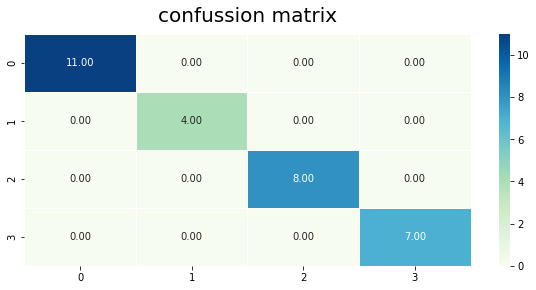

In [26]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)

import seaborn as sns

f, ax =plt.subplots(figsize=(10,4))
hm = sns.heatmap(
    np.round(cm,2),
    annot=True,
    ax=ax,
    cmap="GnBu",
    fmt='.2f',
    linewidths=0.7
)
f.subplots_adjust(top=0.93)
#t = f.suptitle("Inssurance Health Correlation Heatmap", fontsize=14)
hm.set_title('confussion matrix', fontdict={'fontsize':20}, pad=12)

## Save your model

Add code below to save your model's trained weights.

In [27]:
# Code to save your model
# Save the trained model
modelFileName = 'models/shape_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/shape_classifier.h5


## Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 [==============================] - 0s 20ms/step


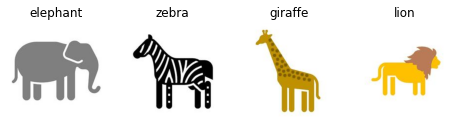

In [28]:
from tensorflow.keras import models
import numpy as np
import os
%matplotlib inline

# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index


# Load your model
model = models.load_model(modelFileName) # loads the saved model

# The images are in the data/shapes folder
test_data_path = 'data/safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

Hopefully, your model predicted all four of the image classes correctly!